In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/Final_cleaned_up_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df = pd.get_dummies(df, columns=['LU','STRUCTURE_CLASS','OWN_OCC','RorU','AC'])
df

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PID,ZIPCODE,AV_TOTAL,YR_BUILT,LIVING_AREA,HEAT_TYP,Year,LU_A,LU_CD,LU_E,...,STRUCTURE_CLASS_R,OWN_OCC_N,OWN_OCC_Y,RorU_R,RorU_U,AC_C,AC_D,AC_E,AC_F,AC_N
0,2205668000_,2135,604700,1920,2834,W,2014,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1,2205664000_,2135,567000,1920,2952,F,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
2,2205663001_,2135,477600,1920,2390,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
3,2205663000_,2135,442700,1920,2347,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
4,2205662020_,2135,549000,1910,2545,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
5,2205662010_,2135,454200,1910,2218,W,2014,0,0,0,...,1,1,0,1,0,0,0,0,0,1
6,2205660000_,2135,432200,1920,1612,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
7,2205659000_,2135,875200,1912,5770,W,2014,0,0,0,...,1,1,0,1,0,0,0,0,0,1
8,2205658000_,2135,425200,1920,1562,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
9,2205657000_,2135,417500,1932,1707,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1


In [2]:
X = df[['YR_BUILT', 'LIVING_AREA',
        'LU_A','LU_CD','LU_E','LU_EA','LU_R1','LU_R2','LU_R3','LU_RC',
        'STRUCTURE_CLASS_1','STRUCTURE_CLASS_A','STRUCTURE_CLASS_B',
        'STRUCTURE_CLASS_C','STRUCTURE_CLASS_D','STRUCTURE_CLASS_R',
        'OWN_OCC_N','OWN_OCC_Y',
        'RorU_R','RorU_U',
        'AC_C','AC_D','AC_E','AC_F','AC_N']]
y = df[[ 'HEAT_TYP']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(penalty='l1',class_weight='balanced')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
training_accuracy = clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
print ("Accuracy on training data: %0.4f" % (training_accuracy))
print ("Accuracy on test data:     %0.4f" % (test_accuracy))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

Accuracy on training data: 0.6509
Accuracy on test data:     0.6532
0.6532421223
             precision    recall  f1-score   support

          E       0.18      0.06      0.08      1440
          F       0.57      0.13      0.21     19483
          N       0.00      0.00      0.00       144
          O       0.00      0.00      0.00        44
          P       0.02      0.69      0.03       148
          S       0.10      0.49      0.16      1044
          W       0.77      0.85      0.81     56781

avg / total       0.70      0.65      0.64     79084



In [5]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytest, ypred)
cnf_matrix

array([[   80,    39,     0,     2,    90,   203,  1026],
       [   95,  2468,     1,    16,  2994,   898, 13011],
       [    1,     5,     0,     0,     3,    18,   117],
       [    0,     0,     0,     0,     3,     7,    34],
       [    0,    24,     0,     0,   102,     0,    22],
       [    4,    13,     0,     0,     9,   507,   511],
       [  276,  1751,     5,    85,  2518,  3642, 48504]])

In [6]:
# Confusion Matrix Visualization
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[   80    39     0     2    90   203  1026]
 [   95  2468     1    16  2994   898 13011]
 [    1     5     0     0     3    18   117]
 [    0     0     0     0     3     7    34]
 [    0    24     0     0   102     0    22]
 [    4    13     0     0     9   507   511]
 [  276  1751     5    85  2518  3642 48504]]


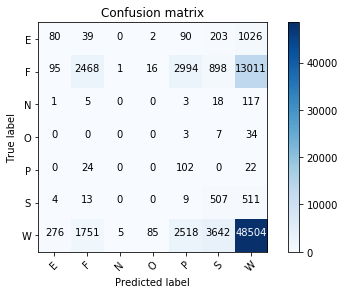

In [7]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['E', 'F','N','O','P','S','W'], 
                      title='Confusion matrix')
plt.show()

In [9]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(Xtrain,ytrain)
column_name = list(X)
coe = clf.coef_.tolist()
p_values = []
for i in pvalues:
    p_values.append(format(i,'f'))
x = pd.DataFrame(
    {'Column name': column_name,
     'P_Value': p_values,
     'Coefficient': coe[0]
    },columns=['Column name', 'P_Value', 'Coefficient'])
x

,Column name,P_Value,Coefficient
0,YR_BUILT,0.000000,0.014432
1,LIVING_AREA,0.000000,-0.000690
2,LU_A,0.000018,-2.371408
3,LU_CD,0.000000,0.000000
4,LU_E,0.000000,-1.663260
5,LU_EA,0.000000,-1.257574
6,LU_R1,0.000000,-3.771978
7,LU_R2,0.000000,-2.942005
8,LU_R3,0.000000,-2.073889
9,LU_RC,0.017728,-5.909151
